In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.utils import class_weight
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
warnings.filterwarnings('ignore', 'Solver terminated early.*')

C:\Users\asus\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
df = pd.read_csv('preprocessed_data.csv', sep='\t')
df.head()

,Unnamed: 0,gender,age,openness,responsibility,neuroticism,honesty,compatibility,extraversion,regularity,patience,element,personality
0,0,1,22,4,6,2,6,5,5,6,6,3,4
1,1,0,23,5,5,3,6,6,5,4,4,0,2
2,2,0,25,6,4,4,5,6,6,3,3,1,3
3,3,1,21,4,6,2,5,6,5,4,3,2,1
4,4,1,21,4,5,6,5,6,5,5,4,3,0


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,gender,age,openness,responsibility,neuroticism,honesty,compatibility,extraversion,regularity,patience,element,personality
0,1,22,4,6,2,6,5,5,6,6,3,4
1,0,23,5,5,3,6,6,5,4,4,0,2
2,0,25,6,4,4,5,6,6,3,3,1,3
3,1,21,4,6,2,5,6,5,4,3,2,1
4,1,21,4,5,6,5,6,5,5,4,3,0


In [ ]:
# Feature Selection

X_new = SelectKBest(chi2, k=3).fit_transform(df[df.columns[:-1]], df['personality'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X_new, df['personality'], test_size=0.2, random_state=42)

X_new.shape

In [4]:
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['personality'], test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

216
55


In [56]:
best_scores = {}

# MODELS

## 1- Logistic Regression

Precision: 0.5029
Recall: 0.3318
Accuracy: 0.4909
F1 Score: 0.3559
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.50      0.33      0.40         6
           2       0.54      0.81      0.65        26
           3       0.14      0.12      0.13         8
           4       1.00      0.25      0.40         8

    accuracy                           0.49        55
   macro avg       0.50      0.33      0.36        55
weighted avg       0.52      0.49      0.45        55



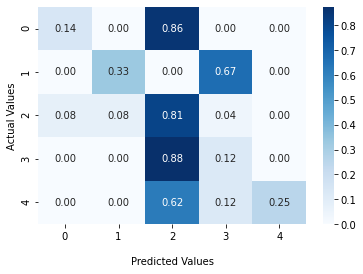

[0.47619047619047616,
 0.5,
 0.5238095238095238,
 0.5454545454545454,
 0.5454545454545454,
 0.5454545454545454,
 0.5909090909090909,
 0.6666666666666666,
 0.7142857142857143,
 0.7272727272727273]

In [57]:
#logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)).fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')

table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

scores = cross_val_score(logreg, X_train, y_train, cv=10)
best_scores['logreg'] = sorted(scores)[-1]
sorted(scores)

In [58]:
best_scores['logreg']

0.7272727272727273

In [12]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

#model = LogisticRegression(class_weight = class_weights, max_iter=1000).fit(X_train, y_train)
model=make_pipeline(StandardScaler(), LogisticRegression(class_weight=class_weights)).fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=10)
sorted(scores)

[0.23809523809523808,
 0.23809523809523808,
 0.3181818181818182,
 0.3181818181818182,
 0.3181818181818182,
 0.3333333333333333,
 0.36363636363636365,
 0.38095238095238093,
 0.4090909090909091,
 0.45454545454545453]

## 2- Support Vector Machine

C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classificati

Precision: 0.2696
Recall: 0.3266
Accuracy: 0.4364
F1 Score: 0.2761
              precision    recall  f1-score   support

           0       0.17      0.14      0.15         7
           1       0.00      0.00      0.00         6
           2       0.62      0.62      0.62        26
           3       0.32      0.75      0.44         8
           4       0.25      0.12      0.17         8

    accuracy                           0.44        55
   macro avg       0.27      0.33      0.28        55
weighted avg       0.39      0.44      0.40        55



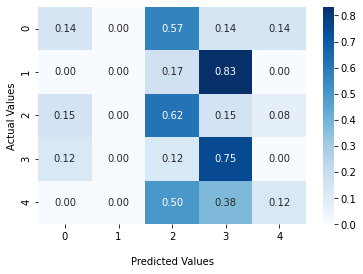

[0.2727272727272727,
 0.2857142857142857,
 0.3333333333333333,
 0.45454545454545453,
 0.45454545454545453,
 0.5,
 0.5,
 0.5238095238095238,
 0.5454545454545454,
 0.6666666666666666]

In [59]:
svm = make_pipeline(MinMaxScaler(), SVC(max_iter=15)).fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')

table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

scores = cross_val_score(svm, X_train, y_train, cv=10)
best_scores['svm'] = sorted(scores)[-1]
sorted(scores)

## 3- Stochastic Gradient Descent

C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classificati

Precision: 0.1202
Recall: 0.1865
Accuracy: 0.4000
F1 Score: 0.1459
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         6
           2       0.54      0.81      0.65        26
           3       0.06      0.12      0.08         8
           4       0.00      0.00      0.00         8

    accuracy                           0.40        55
   macro avg       0.12      0.19      0.15        55
weighted avg       0.26      0.40      0.32        55



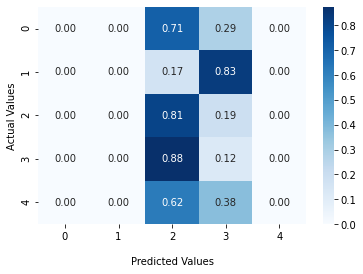

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.14285714285714285,
 0.2727272727272727,
 0.3181818181818182,
 0.3181818181818182,
 0.45454545454545453,
 0.45454545454545453,
 0.5238095238095238,
 0.5714285714285714,
 0.6818181818181818,
 0.7142857142857143]

In [60]:
sgd = SGDClassifier(loss="hinge", penalty="l2", shuffle=False, max_iter=90).fit(X_train, y_train)
#sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=90, tol=1e-3)).fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')

table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

scores = cross_val_score(sgd, X_train, y_train, cv=10)
best_scores['sgd'] = sorted(scores)[-1]
sorted(scores)

## 4- Naive Bayes

Precision: 0.3987
Recall: 0.2523
Accuracy: 0.3636
F1 Score: 0.2640
              precision    recall  f1-score   support

           0       0.14      0.14      0.14         7
           1       1.00      0.17      0.29         6
           2       0.48      0.58      0.53        26
           3       0.20      0.25      0.22         8
           4       0.17      0.12      0.14         8

    accuracy                           0.36        55
   macro avg       0.40      0.25      0.26        55
weighted avg       0.41      0.36      0.35        55



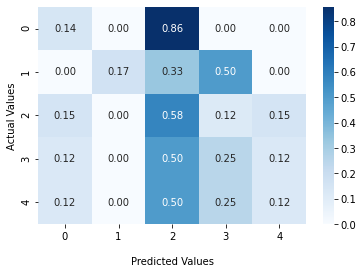

[0.38095238095238093,
 0.4090909090909091,
 0.42857142857142855,
 0.45454545454545453,
 0.5,
 0.5,
 0.5454545454545454,
 0.5714285714285714,
 0.5909090909090909,
 0.6190476190476191]

In [61]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')

table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

scores = cross_val_score(gnb, X_train, y_train, cv=10)
best_scores['gnb'] = sorted(scores)[-1]
sorted(scores)

## 5- K-Nearest Neighbor

Precision: 0.3987
Recall: 0.2523
Accuracy: 0.3636
F1 Score: 0.2640
              precision    recall  f1-score   support

           0       0.14      0.14      0.14         7
           1       1.00      0.17      0.29         6
           2       0.48      0.58      0.53        26
           3       0.20      0.25      0.22         8
           4       0.17      0.12      0.14         8

    accuracy                           0.36        55
   macro avg       0.40      0.25      0.26        55
weighted avg       0.41      0.36      0.35        55



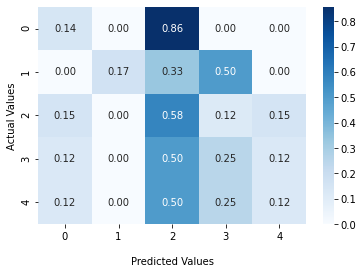

[0.38095238095238093,
 0.45454545454545453,
 0.45454545454545453,
 0.5,
 0.5238095238095238,
 0.5454545454545454,
 0.5714285714285714,
 0.5909090909090909,
 0.5909090909090909,
 0.6666666666666666]

In [62]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')

table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

scores = cross_val_score(knn, X_train, y_train, cv=10)
best_scores['knn'] = sorted(scores)[-1]
sorted(scores)

In [66]:
best_scores

{'logreg': 0.7272727272727273,
 'svm': 0.6666666666666666,
 'sgd': 0.7142857142857143,
 'gnb': 0.6190476190476191,
 'knn': 0.6666666666666666}

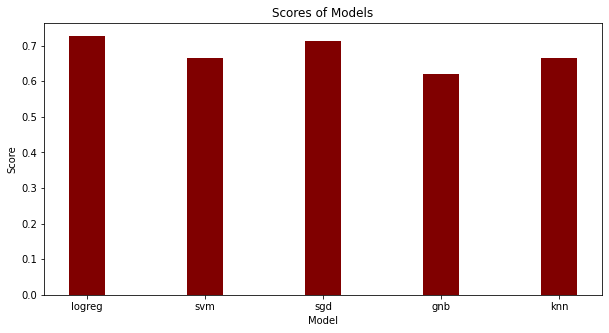

In [64]:
models = list(best_scores.keys())
scores = list(best_scores.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, scores, color ='maroon', width = 0.3)
 
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Scores of Models")
plt.show()

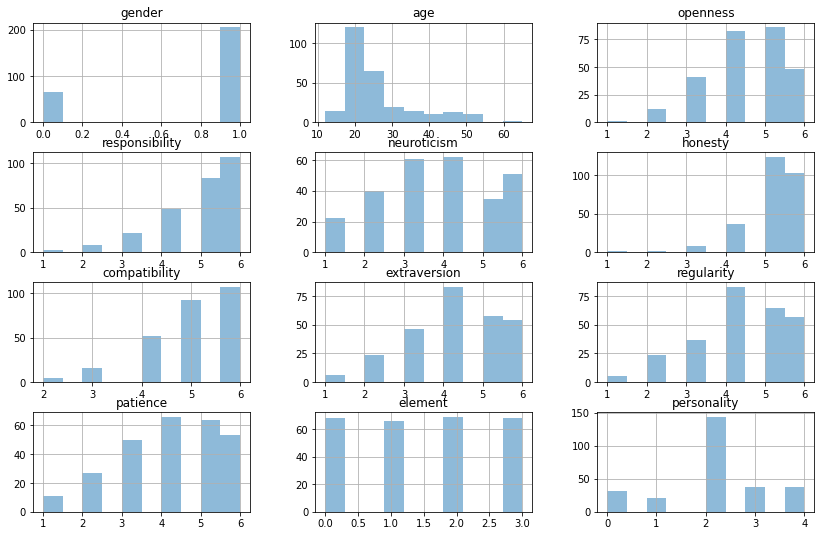

In [32]:
df.hist(alpha=0.5, figsize=(14, 9), bins = 10)
pyplot.show()

In [ ]:
# Gaussian: age, openness, extraversion, regularity, patience
# Non-Gaussian: gender, responsibility, neuroticism, honesty, compatibility, element

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Normalize_Var = ['age', 'openness', 'extraversion', 'regularity', 'patience']
Normalize_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

Standardize_Var = ['gender', 'responsibility', 'neuroticism', 'honesty', 'compatibility']
Standardize_transformer = Pipeline(steps=[('standard', StandardScaler())])


In [ ]:
preprocessor = ColumnTransformer(transformers = [('standard', Standardize_transformer, Standardize_Var), ('norm', Normalize_transformer, Normalize_Var)])

#clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(solver='lbfgs'))]).fit(X_train, y_train)
clf = Pipeline(steps=[('preprocessor', preprocessor), ('sgd', SGDClassifier(loss="hinge", penalty="l2", shuffle=False, max_iter=100))]).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')

table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

scores = cross_val_score(clf, X_train, y_train, cv=10)
sorted(scores)
#print('Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: {:.2f}'.format(clf.score(X_test, y_test)))